In [ ]:
from multiprocessing import Pool
from lane_detector import *
from car import *
from utils import *
import cv2
import numpy as np
import matplotlib.pyplot as plt
import time

In [ ]:
from main import Program,test
F = 2800
FOCAL_LENGTH = 4.74
config = {
    "polygon_height": 180,
    "lane_center1": 720,
    "lane_width1": 70*2,
    "lane_center2": 700,
    "lane_width2": 380*2,
}
src = "../rsrc/video2.mp4"
if __name__ == "__main__":
    test()

In [ ]:
"""
cc = cv2.imread("cc.png")
car_cascade_src = 'cars.xml'
car_cascade = cv2.CascadeClassifier(car_cascade_src)
cars = car_cascade.detectMultiScale(cc, 1.1, 1)
for (x, y, w, h) in cars:
  cv2.rectangle(cc, (x, y), (x+w, y+h), (255, 0, 0), 2)
# show_img(cc)
def get_object_distance2(f,d,D):
    return D*f/d
focal  = 4.74
str(get_object_distance(2800,focal,1240-400,8 *10,1)/10) + " cm",get_object_distance2(focal,1240-400,10)
"""

In [ ]:
callable(cv2.warpPerspective)

In [ ]:
from calibrate import calibrate
ret, cameraMatrix, dist, rvecs, tvecs = calibrate("../CV/*.jpg",(9,6),show_chessboard=False,ratio=6)
# np.save("../cameraMatrix.npy",cameraMatrix)

In [ ]:
0x10000

In [39]:
from utils import *
ret = calibrate("../rsrc/calibration/*.jpg",(9,6),show_chessboard=False)
save_camera_info(ret)

Found 12 images


100%|██████████| 12/12 [00:22<00:00,  1.86s/it]

Using 11 points to calibrate the camera.
Saved


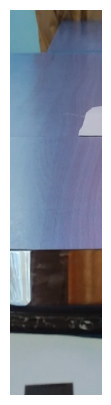

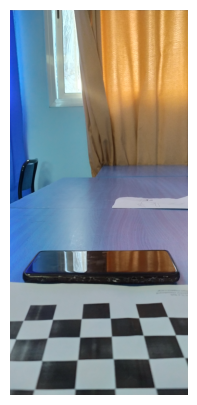

In [17]:
ret_, cameraMatrix, dist, rvecs, tvecs = ret
im = cv2.imread("../rsrc/S9p.jpg")
h,  w = im.shape[:2]
new = undistort(im,cameraMatrix,dist,crop=True,use_optimal=True)
show_img(new,figsize=(5,5))
show_img(im,figsize=(5,5))

found matrix:
 [[3.07384613e+03 0.00000000e+00 9.33568892e+02]
 [0.00000000e+00 3.05940505e+03 2.16221168e+03]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
3066.625593388662
652.4735305082258
652


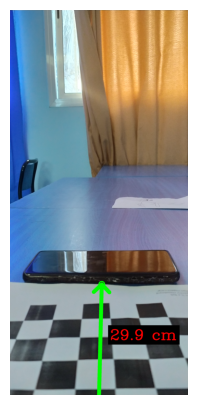

In [38]:
from utils import *
import cv2
import numpy as np
f = load_f_from_file()
print(f)
distance = get_object_distance(f, 4.7, 1770-130, 160)/10
im = cv2.imread("../rsrc/S9p.jpg")
object_box = (130, 2500, 1640, 350)
draw_distance_to_object(im,object_box,distance,unit="cm")
show_img(im,figsize=(5,5))

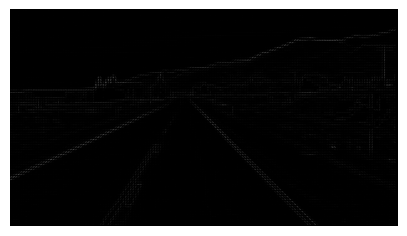

In [197]:
from skimage.feature import hog
im = cv2.imread("../rsrc/img.png", 0)
features, hog_image = hog(im,
                        #   pixels_per_cell=(pix_per_cell, pix_per_cell),
                        #   cells_per_block=(
                        #       cell_per_block, cell_per_block),
                        # transform_sqrt=True,
                        visualize=True)
show_gray_img(hog_image)

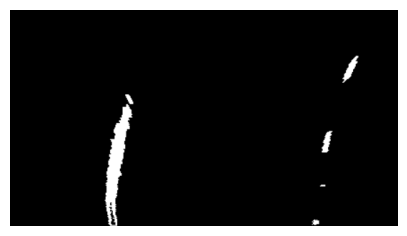

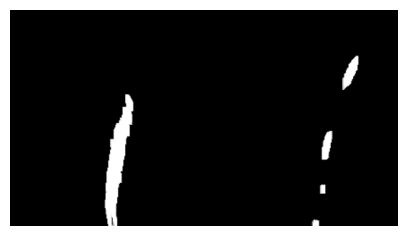

In [189]:
from utils import *
im = cv2.imread("../rsrc/test.png",0)
show_gray_img(im)
im = cv.dilate(im,(50,50), iterations=10)
show_gray_img(im)

255 0


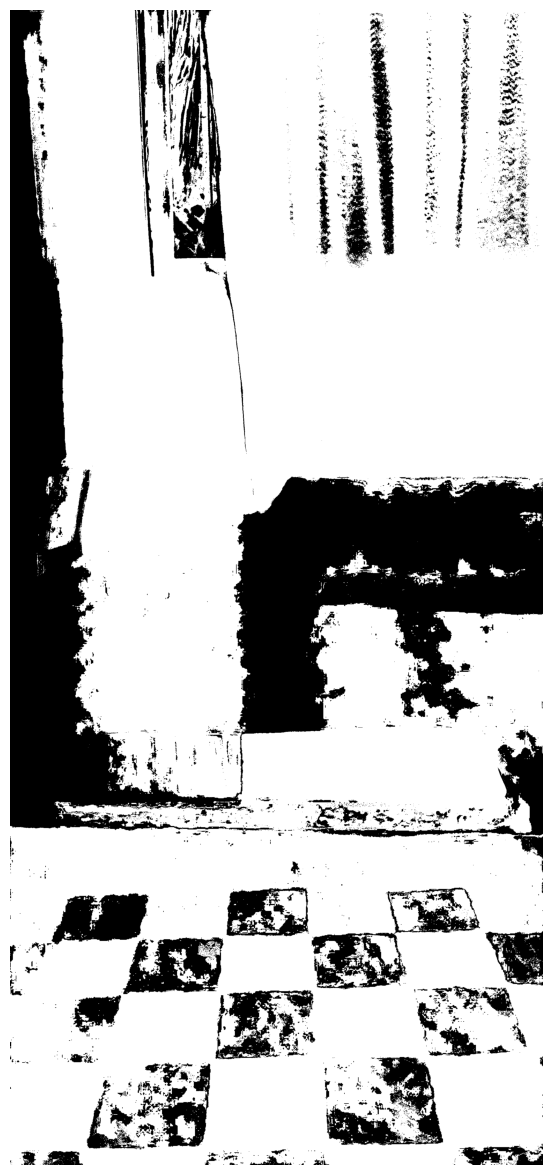

In [65]:
def thresh_frame_in_HSV(frame, min_values, max_values, verbose=False):
    """
    Threshold a color frame in HSV space
    """
    # HSV = frame
    HSV = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    min_th_ok = np.all(HSV > min_values, axis=2)
    print(HSV.max(),HSV.min())
    max_th_ok = np.all(HSV < max_values, axis=2)

    out = np.logical_and(min_th_ok, max_th_ok)

    return out


im = cv2.imread("../rsrc/S9p.jpg")
im = thresh_frame_in_HSV(im,15,250,)
show_img(im,cmap='gray')

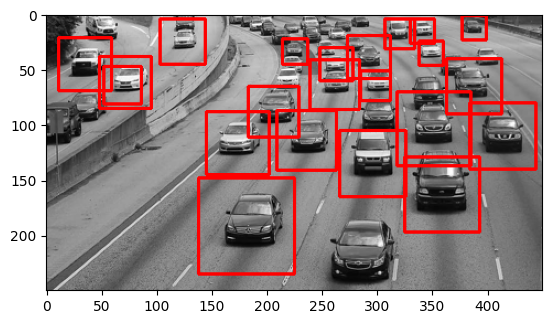

In [3]:
import cv2
im = cv2.imread("../rsrc/cc.png")
car_cascade_src = '../cars.xml'
car_cascade = cv2.CascadeClassifier(car_cascade_src)
cars = car_cascade.detectMultiScale(im, 1.1, 1)
for x, y, w, h in cars:
    cv2.rectangle(im, (x, y), (x+w, y+h), (255, 0, 0), 2)
import matplotlib.pyplot as plt
plt.imshow(im)

In [15]:
!pip install pandas -q
!pip install requests -q
!pip install torchvision -q


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\PyCy\\AppData\\Local\\Programs\\Python\\Python39\\Lib\\site-packages\\~orch\\lib\\asmjit.dll'
Consider using the `--user` option or check the permissions.


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
import requests

ModuleNotFoundError: No module named 'requests'

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\PyCy/.cache\torch\hub\master.zip
YOLOv5  2023-5-18 Python-3.9.5 torch-2.0.1+cpu CPU

Fusing layers... 


requirements: C:\Users\PyCy\AppData\Local\Programs\Python\Python39\Lib\site-packages\requirements.txt not found, check failed.


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [10]:
import cv2
capture = cv2.VideoCapture("../rsrc/tanj.mp4")
# fps = capture.get(cv2.CAP_PROP_FPS)

capture.get(cv2.CAP_PROP_FRAME_COUNT)/30/60

12.848888888888888

In [5]:
import matplotlib.pyplot as plt
import torch
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')
import cv2
import numpy as np
from utils_ import seek_video
from car import is_vehicule,vehicule_classes



def process(frame):
    results = model(frame)
    for car in results.pandas().xyxy[0].to_numpy():
        x,y,xmax,ymax,conf,c,name = car
        if not is_vehicule(vehicule_classes,name):
            continue
        x,y,xmax,ymax = int(x),int(y),int(xmax),int(ymax)
        cv2.rectangle(frame, (x, y), (xmax,ymax), (255, 0, 0), 2)
    return frame

video = cv2.VideoCapture("../rsrc/tanj.mp4")
seek_video(video,2*60)
while True:
    on,frame = video.read()
    if not on:
        break
    frame = process(frame)
    cv2.imshow("window",frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cv2.destroyAllWindows()

Using cache found in C:\Users\PyCy/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2023-5-18 Python-3.9.5 torch-2.0.1+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


requirements: C:\Users\PyCy\AppData\Local\Programs\Python\Python39\Lib\site-packages\requirements.txt not found, check failed.


In [1]:
import logging
# Add this line before the PyTorch log messages appear
logging.getLogger('yolov5').setLevel(logging.CRITICAL)
import cv2
from car import CarDetector
from utils_ import seek_video
video = cv2.VideoCapture("../rsrc/tanj.mp4")
seek_video(video,2*60)

on,frame = video.read()
car = CarDetector(2800,4.74,frame.shape[1]//2)
while True:
    on,frame = video.read()
    if not on:
        break
    car.detect(frame)
    frame=car.draw(frame)
    cv2.putText(frame,f"safe: {car.safe}", (10,30),cv2.FONT_HERSHEY_COMPLEX,.8,(255,0,0),2)
    cv2.imshow("window",frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cv2.destroyAllWindows()

Using cache found in ../ultralytics_yolov5_master
YOLOv5  2023-5-19 Python-3.9.5 torch-2.0.1+cpu CPU

Fusing layers... 


requirements: C:\Users\PyCy\AppData\Local\Programs\Python\Python39\Lib\site-packages\requirements.txt not found, check failed.


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [168]:
from lane_detector import LaneDetector
from utils_ import scale as scale_img
video = cv2.VideoCapture("../rsrc/video1.mp4")
from workers import lane_detect_one_frame
on,frame = video.read()
laned = LaneDetector(frame.shape[:-1],draw_roi=False)
laned.init_polygon(
    config = {
        "polygon_height": 250,
        "lane_center1": 600,
        "lane_width1": 150*2,
        "lane_center2": 650,
        "lane_width2": 400*2,
    }
)
while True:
    on,frame = video.read()
    if not on:
        break
    frame = lane_detect_one_frame(laned,frame)
    frame = laned.draw(frame)
    frame = scale_img(frame,ratio=1.5)
    cv2.imshow("w",frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cv2.destroyAllWindows()


(650, 720)
(9818.840351083812, 12272.097538115237)
(17242.881342378034, 8511.762482473992)
(17242.881342378034, 8511.762482473992)
(34815.44362668393, 10692.548284145065)
(210501.65142142537, 5185.694097323532)
(210501.65142142537, 5185.694097323532)
(30906.71963578388, 4578.33526010839)
(31268.763808112846, 4578.33526010839)
(140165.28770507604, 4917.967390800588)
(140165.28770507604, 4917.967390800588)
(63854.76603972883, 12851.43829790196)
(19002.5287478149, 12365.932241309862)
(19002.5287478149, 12365.932241309862)
(14732.854284052153, 10424.425472258512)
(14732.854284052153, 10424.425472258512)
(16057.496992037584, 9599.325831191636)
(16221.042432451206, 9599.325831191636)
(23407.4549469271, 7482.015124937204)
(23407.4549469271, 7482.015124937204)
(22400.05290973315, 7480.498971243365)
(24428.04755168244, 7480.147734872232)
(23704.044073536297, 7480.147734872232)
(23704.044073536297, 7480.147734872232)
(24138.1907270563, 7458.766032332878)
(24068.04400059645, 7458.766032332878)
(2

In [35]:
import matplotlib.pyplot as plt
import cv2
from utils_ import dilate,threshold,get_curvatures
def pipeline(
    frame,
    use_canny=False,
    color_threshold=100,
    canny_thresholds=(100, 300),
):
    result = frame.copy()
    # result = warp_perspective(frame, (self.H, self.W), self.polygon)
    # self.image_warped = None
    # self.image_warped = result.copy()
    # TODO: add gaussian blur
    # TODO: use equalize_hist
    # TODO: use dilate
    if not use_canny:
        result = cv2.cvtColor(result, cv2.COLOR_RGB2GRAY)
        result = dilate(result, iterations=1)
        result = threshold(result, thresh=color_threshold)
        plt.imshow(result,cmap="gray")
        plt.show()
    else:
        result = canny(
            result, canny_thresholds[0], canny_thresholds[1])
    lines = result.copy()
    radiuses, xs, ys = get_curvatures(result, 50)
    return radiuses, xs, ys

In [172]:
def helper(a):
    if a == "bb":
        return 0
    return 1
sorted(["aa","bb","cc"],key=helper)

['bb', 'aa', 'cc']

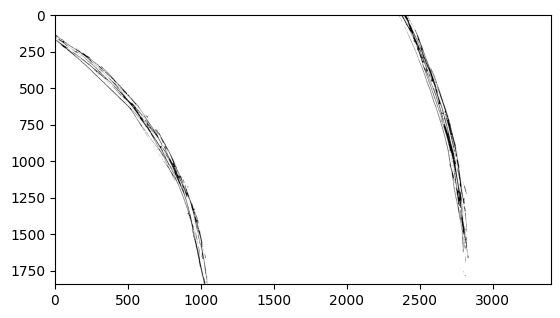

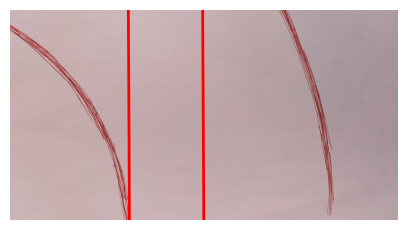

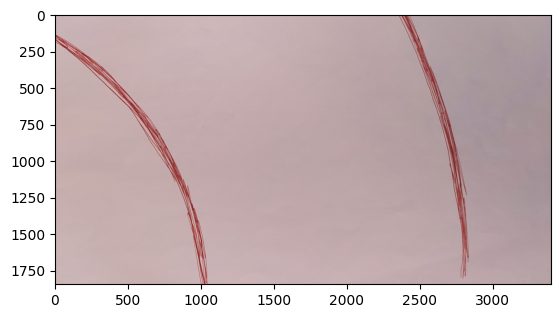

In [157]:
img = cv2.imread("../rsrc/IMG_20230523_100713.jpg")
img = cv2.flip(img,1).transpose(1,0,2)[:,300:-300,:]
radiuses1, xs, ys=pipeline(img)
draw_curvatures(img,xs,ys,figsize=(5,5))
plt.imshow(img)

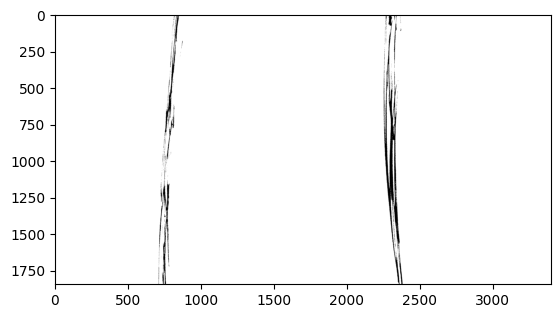

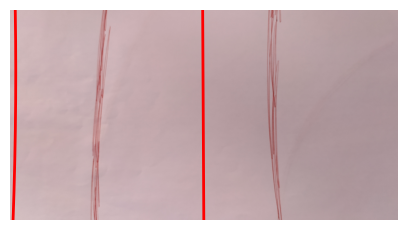

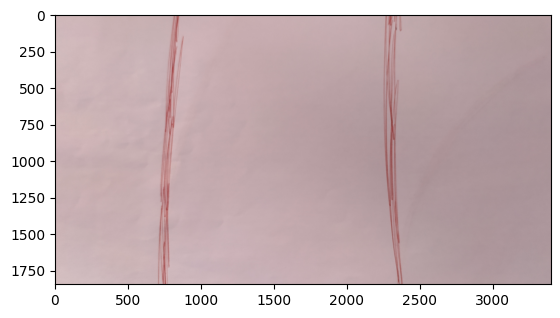

In [39]:
img = cv2.imread("../rsrc/IMG_20230523_100759.jpg")
img = cv2.flip(img,1).transpose(1,0,2)[:,300:-300,:]
radiuses1, xs, ys=pipeline(img,color_threshold=140)
draw_curvatures(img,xs,ys,figsize=(5,5))
plt.imshow(img)

1843


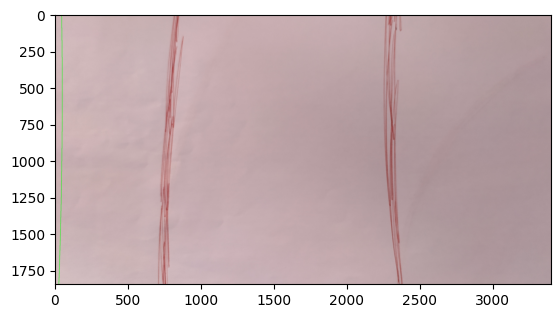

In [49]:
left,right = xs
mid = right-left
import numpy as np
from utils_ import draw_curvatures
def draw_curvatures_cv2(image,x,y,step=1,color=(0,255,0),thickness=2):
    image = np.ascontiguousarray(image, dtype=np.uint8)
    step = 1
    print(len(range(0,len(x)-1,step)))
    for i in range(0,len(x)-1,step):
        point1 = int(x[i]),int(y[i])
        point2 = int(x[i+step]),int(y[i+step])
        cv2.line(image,point1,point2,color,thickness)
    return image
image=draw_curvatures_cv2(img,left,ys)
plt.imshow(image)

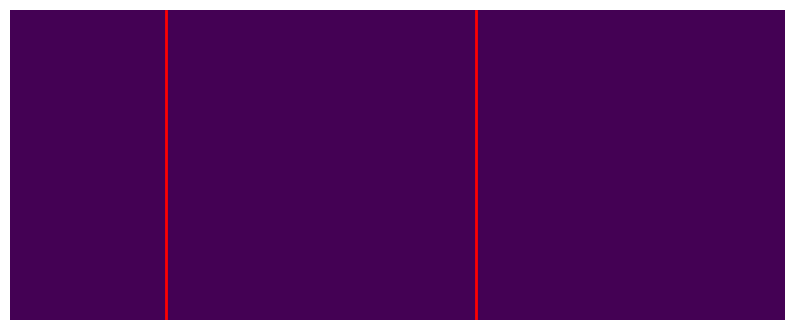

C:\Users\PyCy\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3460: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


212826099.3836575

In [96]:
white = np.ones((200,500))*255
xs = np.ones(200) * 100,np.ones(200) * 300
ys = np.arange(200)
draw_curvatures(white,xs,ys)
a,b,c=np.polyfit(xs[0],ys,2)
from utils_ import polynome
curvature = abs((2 * a) / (1 + (2 * b * ys + c) ** 2) ** (3/2))
radius = 1 / curvature
aaa1=(radius).mean()
aaa1

C:\Users\PyCy\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3460: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


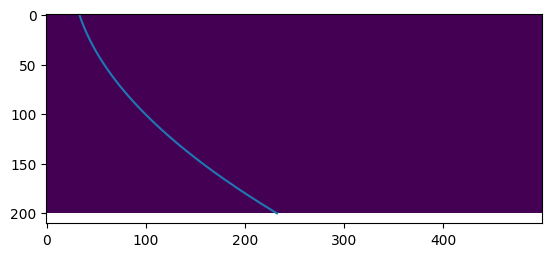

In [146]:
a,b,c=np.polyfit(xs[0],ys,2)
from utils_ import polynome
curvature = abs((2 * a) / (1 + (2 * b * ys + c) ** 2) ** (3/2))
radius = 1 / curvature
radius = ((1 + (2*a*ys[-9] + b)**2)**1.5) /np.absolute(2*c)*1000
plt.imshow(white)
yy = np.linspace(0,200,200)
plt.plot(a*yy**2+b*yy+c,yy)
radius
def get_radius(x,y):
    a,b,c=np.polyfit(x,y,2)
    curvature = abs((2 * a) / (1 + (2 * b * y + c) ** 2) ** (3/2))
    radius = 1 / curvature
    # radius = ((1 + (2*a*ys[-9] + b)**2)**1.5) /np.absolute(2*c)
    return np.mean(radius)

C:\Users\PyCy\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3460: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


(215.19125068748838, 1.011420971338657e+18, 9.478173403362893e+17)

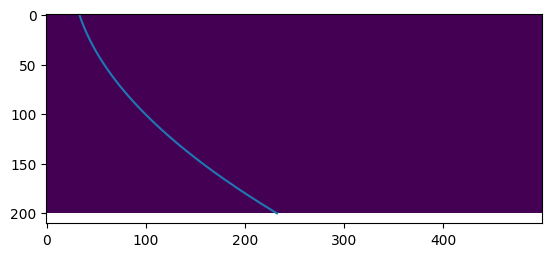

In [162]:
xs = np.ones(200) * 100,np.ones(200) * 300
ys = np.arange(200)
a,b,c=np.polyfit(xs[0],ys,2)
plt.imshow(white)
yy = np.linspace(0,200,200)
xx = a*(yy**2)+(b*yy)+c
plt.plot(xx,yy)
def get_radius(x,y):
    a,b,c=np.polyfit(y,x,2)
    curvature = abs((2 * a) / (1 + (2 * b * y + c) ** 2) ** (3/2))
    radius = 1 / curvature
    # radius = ((1 + (2*a*ys[-9] + b)**2)**1.5) /np.absolute(2*c) 
    return np.mean(radius) / 1_000_000
get_radius(xx,yy),get_radius(xs[0],ys),get_radius(xs[1],ys)

C:\Users\PyCy\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3460: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


(266321074.56867477, 1.011420971338657e+24, 9.478173403362892e+23)

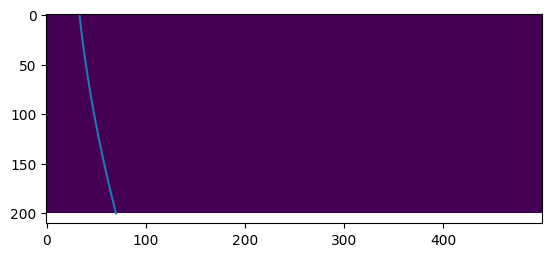

In [158]:
xs = np.ones(200) * 100,np.ones(200) * 300
ys = np.arange(200)
a,b,c=np.polyfit(xs[1],ys,2)
plt.imshow(white)
yy = np.linspace(0,200,200)
xx = a*(yy**2)+(b*yy)+c
plt.plot(xx,yy)
def get_radius(x,y):
    a,b,c=np.polyfit(y,x,2)
    curvature = abs((2 * a) / (1 + (2 * b * y + c) ** 2) ** (3/2))
    radius = 1 / curvature
    # radius = ((1 + (2*a*ys[-9] + b)**2)**1.5) /np.absolute(2*c)
    return np.mean(radius)
get_radius(xx,yy),get_radius(xs[0],ys),get_radius(xs[1],ys)

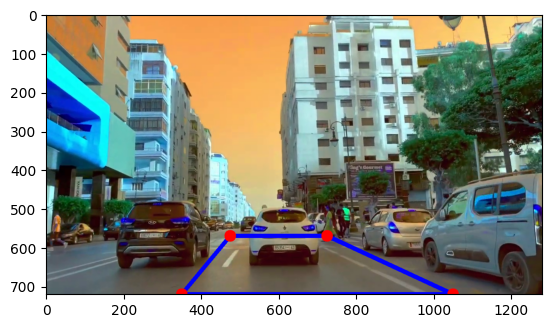

In [16]:
from utils_ import draw_polygon,init_polygon,seek_video
import cv2
import matplotlib.pyplot as plt
video = cv2.VideoCapture("../rsrc/tanj.mp4")
seek_video(video, 2 * 60)
on,frame=video.read()
h,w = frame.shape[:2]
poly=init_polygon(
    {
        "polygon_height": 150,
        "lane_center1": 600,
        "lane_width1": 125*2,
        "lane_center2": 700,
        "lane_width2": 350*2,
    },
    h
)[0]
frame=draw_polygon(frame,poly)
video.release()
cv2.destroyAllWindows()
plt.imshow(frame)

PyQt6.QtCore.QByteArray()